In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [330]:
df=pd.read_csv('combined_dataset.csv')

In [331]:
df

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,dataset
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2.0,train
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1.0,train
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5.0,train
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5.0,train
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56906,fffe43004900440035003600330037003800,Kraig Peele,12,M,2V0HA0O,NaN,Gold Membership,2015-01-25,No,xxxxxxxx,...,46279.35,18.0,708.120000,No,Yes,No,Not Applicable,Poor Product Quality,NaN,test
56907,fffe43004900440032003900370037003100,Damaris Sabol,40,F,VJGQD6Q,Village,No Membership,2017-12-31,Yes,CID45490,...,23466.26,Error,574.340000,No,Yes,No,Not Applicable,No reason specified,NaN,test
56908,fffe43004900440036003100310036003700,Loura Huckstep,55,M,ADE7LWA,Town,No Membership,2015-09-09,No,xxxxxxxx,...,17903.75,24.0,564.300000,No,Yes,Yes,Unsolved,No reason specified,NaN,test
56909,fffe43004900440034003200330033003600,Sharita Clubb,17,F,A35KUBS,City,Silver Membership,2016-04-17,Yes,CID37167,...,14057.09,22.0,606.340000,No,Yes,No,Not Applicable,Poor Website,NaN,test


In [332]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()  

Unique values in 'customer_id':
['fffe4300490044003600300030003800' 'fffe43004900440032003100300035003700'
 'fffe4300490044003100390032003600' ...
 'fffe43004900440036003100310036003700'
 'fffe43004900440034003200330033003600'
 'fffe43004900440036003200340030003100']

Unique values in 'Name':
['Pattie Morrisey' 'Traci Peery' 'Merideth Mcmeen' ... 'Loura Huckstep'
 'Sharita Clubb' 'Ying Branum']

Unique values in 'gender':
['F' 'M' 'Unknown']

Unique values in 'security_no':
['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'ADE7LWA' 'A35KUBS' 'IPJKJJV']

Unique values in 'region_category':
['Village' 'City' 'Town' nan]

Unique values in 'membership_category':
['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']

Unique values in 'joining_date':
['2017-08-17' '2017-08-28' '2016-11-11' ... '2017-12-11' '2016-09-25'
 '2017-04-15']

Unique values in 'joined_through_referral':
['No' '?' 'Yes']

Unique values in 'referral_id':
['xxxxxxxx' 'C

In [333]:
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56911 entries, 0 to 56910
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   56911 non-null  object 
 1   Name                          56911 non-null  object 
 2   age                           56911 non-null  int64  
 3   gender                        56911 non-null  object 
 4   security_no                   56911 non-null  object 
 5   region_category               48535 non-null  object 
 6   membership_category           56911 non-null  object 
 7   joining_date                  56911 non-null  object 
 8   joined_through_referral       56911 non-null  object 
 9   referral_id                   56911 non-null  object 
 10  preferred_offer_types         56464 non-null  object 
 11  medium_of_operation           56911 non-null  object 
 12  internet_option               56911 non-null  object 
 13  l

In [334]:
# Normalize the columns
df.columns = df.columns.str.lower().str.replace(' ', '_')  
modified_columns = df.columns.tolist()

df.columns


Index(['customer_id', 'name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'dataset'],
      dtype='object')

In [335]:
decimal_columns = ['avg_time_spent','avg_frequency_login_days','points_in_wallet']  # Replace with your actual column names
df[decimal_columns] = df[decimal_columns].round(2)

In [336]:
df['joining_date'] = pd.to_datetime(df['joining_date'], errors='coerce')
print(df['joining_date'].head())
nat_count = df['joining_date'].isna().sum()

print(f"Number of NaT values in 'joining_date': {nat_count}")

0   2017-08-17
1   2017-08-28
2   2016-11-11
3   2016-10-29
4   2017-09-12
Name: joining_date, dtype: datetime64[ns]
Number of NaT values in 'joining_date': 0


In [337]:
# Duplicate rows 
duplicate_rows = df[df.duplicated(keep=False)]
num_duplicate_rows = duplicate_rows.shape[0]

print(f"Number of duplicate rows: {num_duplicate_rows}")

if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows)

Number of duplicate rows: 0


In [338]:
# Check for duplicates in each column 
results = []
for col in df.columns:
    num_duplicates = df.duplicated(subset=[col], keep=False).sum()

    if num_duplicates > 0:
        results.append({'Column': col, 'Duplicate Status': 'Has duplicates'})
    else:
        results.append({'Column': col, 'Duplicate Status': 'No duplicates'})

results_df = pd.DataFrame(results)
print(results_df)

                          Column Duplicate Status
0                    customer_id    No duplicates
1                           name    No duplicates
2                            age   Has duplicates
3                         gender   Has duplicates
4                    security_no    No duplicates
5                region_category   Has duplicates
6            membership_category   Has duplicates
7                   joining_date   Has duplicates
8        joined_through_referral   Has duplicates
9                    referral_id   Has duplicates
10         preferred_offer_types   Has duplicates
11           medium_of_operation   Has duplicates
12               internet_option   Has duplicates
13               last_visit_time   Has duplicates
14         days_since_last_login   Has duplicates
15                avg_time_spent   Has duplicates
16         avg_transaction_value   Has duplicates
17      avg_frequency_login_days   Has duplicates
18              points_in_wallet   Has duplicates


In [339]:
if df['customer_id'].is_unique:
    df.set_index('customer_id', inplace=True)
    print("Successfully set 'customer_id' as index.")
else:
    print("Cannot set 'customer_id' as index, duplicates still present.")

Successfully set 'customer_id' as index.


In [340]:
df.drop(['name', 'security_no', 'last_visit_time'], axis=1, inplace=True)

In [341]:
# df.reset_index(inplace=True)

# df = df.drop(['Name', 'security_no'], axis=1)
# print(df.columns)

In [342]:
# Filter the dataset to include only rows with non-missing churn_risk_score
df_valid_churn = df[df['churn_risk_score'].notna()]

# Check the shape of the filtered data to ensure correctness
print(f"Filtered data shape: {df_valid_churn.shape}")


Filtered data shape: (36992, 22)


In [343]:
# Step 1: Filter out rows with null values in 'points_in_wallet'
df_valid_churn = df_valid_churn[df_valid_churn['points_in_wallet'].notna()]

# Check the shape after removing null values in 'points_in_wallet'
print(f"Shape after removing nulls in 'points_in_wallet': {df_valid_churn.shape}")

# Step 2: Calculate the correlation between 'points_in_wallet' and 'churn_risk_score'
correlation = df_valid_churn['points_in_wallet'].corr(df_valid_churn['churn_risk_score'])

# Display the correlation
print(f"Correlation between 'points_in_wallet' and 'churn_risk_score': {correlation}")


Shape after removing nulls in 'points_in_wallet': (33549, 22)
Correlation between 'points_in_wallet' and 'churn_risk_score': -0.2646404057771482


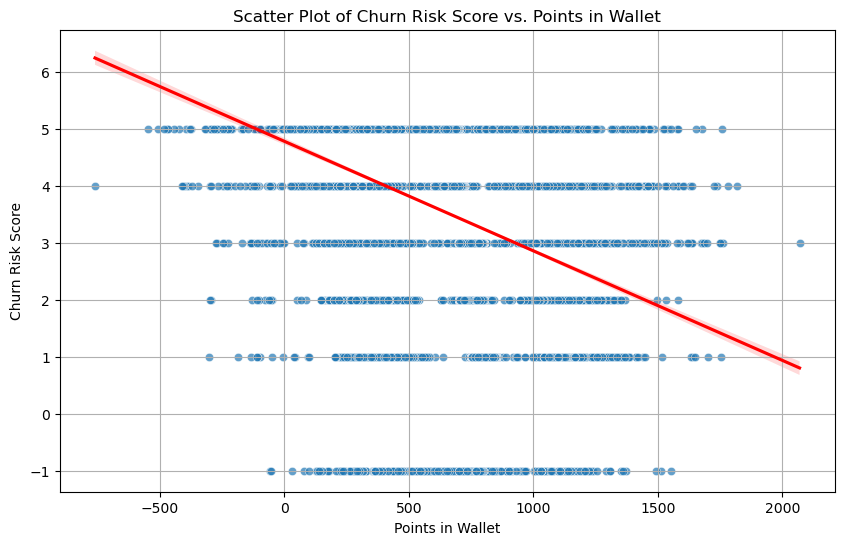

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_valid_churn, x='points_in_wallet', y='churn_risk_score', alpha=0.7)
sns.regplot(data=df_valid_churn, x='points_in_wallet', y='churn_risk_score', scatter=False, color='red')

plt.title('Scatter Plot of Churn Risk Score vs. Points in Wallet')
plt.xlabel('Points in Wallet')
plt.ylabel('Churn Risk Score')
plt.grid(True)
plt.show()


In [348]:
# Filter rows with negative values in 'points_in_wallet'
negative_points_df = df_valid_churn[df_valid_churn['points_in_wallet'] < 0]

# Group by 'churn_risk_score' and count the number of negative values in 'points_in_wallet'
negative_points_count = negative_points_df.groupby('churn_risk_score')['points_in_wallet'].count()

# Display the result
print(negative_points_count)


churn_risk_score
-1.0     2
 1.0     8
 2.0     9
 3.0    24
 4.0    33
 5.0    60
Name: points_in_wallet, dtype: int64


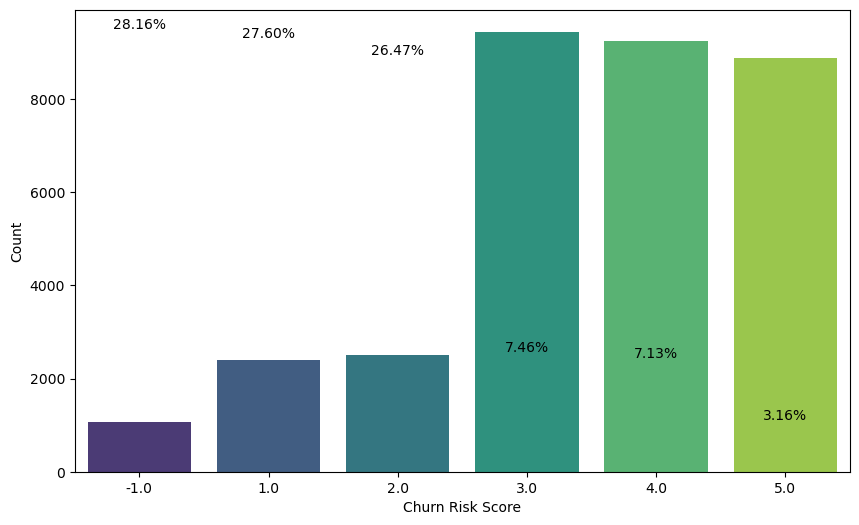

In [352]:
# Count the number of occurrences for each churn risk score
churn_counts = df_valid_churn['churn_risk_score'].value_counts()

# Calculate the percentage of each churn risk score
churn_percent = (churn_counts / churn_counts.sum()) * 100

# Create a DataFrame for easier plotting
churn_data = pd.DataFrame({
    'Churn Risk Score': churn_counts.index,
    'Count': churn_counts.values,
    'Percentage': churn_percent.values
})

# Plotting
plt.figure(figsize=(10, 6))

# Bar plot for counts
sns.barplot(x='Churn Risk Score', y='Count', data=churn_data, palette='viridis')

# Adding percentage labels above the bars
for i, row in churn_data.iterrows():
    plt.text(i, row['Count'], f"{row['Percentage']:.2f}%", ha='center', va='bottom')




In [345]:
# import pandas as pd
# import scipy.stats as stats
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Step 1: Remove rows with null values in the relevant columns
# df_cleaned = df_valid_churn.dropna(subset=['churn_risk_score', 'region_category', 'preferred_offer_types'])

# # Check the shape of the cleaned dataset to ensure correctness
# print(f"Cleaned data shape: {df_cleaned.shape}")

# # Step 2: ANOVA for 'region_category'
# anova_region = stats.f_oneway(
#     *(df_cleaned['churn_risk_score'][df_cleaned['region_category'] == category].dropna()
#       for category in df_cleaned['region_category'].unique())
# )
# print(f"ANOVA for Region Category: F-statistic = {anova_region.statistic}, p-value = {anova_region.pvalue}")

# # Step 3: ANOVA for 'preferred_offer_types'
# anova_offer = stats.f_oneway(
#     *(df_cleaned['churn_risk_score'][df_cleaned['preferred_offer_types'] == category].dropna()
#       for category in df_cleaned['preferred_offer_types'].unique())
# )
# print(f"ANOVA for Preferred Offer Types: F-statistic = {anova_offer.statistic}, p-value = {anova_offer.pvalue}")

# # Step 4: Visualize the results with boxplots
# plt.figure(figsize=(12, 5))

# # Boxplot for Region Category
# plt.subplot(1, 2, 1)
# sns.boxplot(x='region_category', y='churn_risk_score', data=df_cleaned)
# plt.title('Churn Risk Score by Region Category')
# plt.xlabel('Region Category')
# plt.ylabel('Churn Risk Score')

# # Boxplot for Preferred Offer Types
# plt.subplot(1, 2, 2)
# sns.boxplot(x='preferred_offer_types', y='churn_risk_score', data=df_cleaned)
# plt.title('Churn Risk Score by Preferred Offer Types')
# plt.xlabel('Preferred Offer Types')
# plt.ylabel('Churn Risk Score')

# plt.tight_layout()
# plt.show()


In [325]:
df.drop(['points_in_wallet'], axis=1, inplace=True)

In [326]:
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].fillna(0)


# Verify the changes
print(df['avg_frequency_login_days'].dtype)
print(df['avg_frequency_login_days'].head())


float64
customer_id
fffe4300490044003600300030003800        17.0
fffe43004900440032003100300035003700    10.0
fffe4300490044003100390032003600        22.0
fffe43004900440036003000330031003600     6.0
fffe43004900440031003900350030003600    16.0
Name: avg_frequency_login_days, dtype: float64


In [327]:
from IPython.display import display, Markdown, HTML
percent_msng_val = (df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

display(Markdown('Percentage of missing value in entire dataset is: __{}%__'.format(round(percent_msng_val,4))))

Percentage of missing value in entire dataset is: __2.4049%__

In [328]:
#  Missing values 
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage Missing (%)': missing_percentages
})

missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)

                       Missing Values  Percentage Missing (%)
region_category                  8376               14.717717
preferred_offer_types             447                0.785437
churn_risk_score                19919               35.000264


In [283]:
df['region_category'].fillna('Unknown', inplace=True)

In [284]:
# Replace ? with 'Unknown' in the 'medium_of_operation' column
df['medium_of_operation'] = df['medium_of_operation'].replace('?', 'Unknown')

print(df['medium_of_operation'].unique())

['Unknown' 'Desktop' 'Smartphone' 'Both']


In [285]:
print(df['preferred_offer_types'].value_counts(dropna=False)) 


Credit/Debit Card Offers    18876
Gift Vouchers/Coupons       18844
Without Offers              18744
Unknown                       447
Name: preferred_offer_types, dtype: int64


In [286]:
# Replace NaN values with 'Unknown'
df['preferred_offer_types'] = df['preferred_offer_types'].fillna('Unknown')
print("\nAfter Changes:")
print(df['preferred_offer_types'].value_counts(dropna=False))



After Changes:
Credit/Debit Card Offers    18876
Gift Vouchers/Coupons       18844
Without Offers              18744
Unknown                       447
Name: preferred_offer_types, dtype: int64


In [287]:
df['points_in_wallet'] = df['points_in_wallet'].replace('', 0).fillna(0)

KeyError: 'points_in_wallet'

In [288]:
df.loc[(df['joined_through_referral'] == '?') & (df['referral_id'] != 'xxxxxxxx'), 'joined_through_referral'] = 'Yes'
df.loc[(df['joined_through_referral'] == '?') & (df['referral_id'] == 'xxxxxxxx'), 'joined_through_referral'] = 'No'


KeyError: 'referral_id'

In [289]:
df.drop(['referral_id'], axis=1, inplace=True)

KeyError: "['referral_id'] not found in axis"

In [290]:
print(df['joined_through_referral'].value_counts())
print(df['region_category'].value_counts())


Yes    31897
No     25014
Name: joined_through_referral, dtype: int64
Town       21763
City       19529
Unknown     8376
Village     7243
Name: region_category, dtype: int64


In [291]:
#  Missing values 
missing_counts = df.isnull().sum()
missing_percentages = (missing_counts / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage Missing (%)': missing_percentages
})

missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)

                  Missing Values  Percentage Missing (%)
churn_risk_score           19919               35.000264


In [292]:
from IPython.display import display, Markdown, HTML
# calculate the percentage of total missing values in the data
percent_msng_val = (df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100

display(Markdown('Percentage of missing value in entire dataset is: __{}%__'.format(round(percent_msng_val,4))))

Percentage of missing value in entire dataset is: __1.75%__

In [293]:
# Identify columns with numerical data
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Check for negative values in each numerical column
negative_values_info = {}

for column in numerical_columns:
    # Count of negative values
    negative_count = df[df[column] < 0].shape[0]
    
    # Calculate the percentage of negative values
    total_count = df[column].shape[0]  # Total number of rows
    negative_percentage = (negative_count / total_count) * 100
    
    # Store count and percentage if there are any negative values
    if negative_count > 0:
        negative_values_info[column] = {
            'Negative Count': negative_count,
            'Negative Percentage': negative_percentage
        }

# Display columns with negative values and their counts
if negative_values_info:
    print("Columns with negative values, their counts, and percentages:")
    for column, info in negative_values_info.items():
        print(f"{column}: {info['Negative Count']} negative values ({info['Negative Percentage']:.2f}%)")
else:
    print("No negative values found in any numerical columns.")


Columns with negative values, their counts, and percentages:
days_since_last_login: 3021 negative values (5.31%)
churn_risk_score: 1163 negative values (2.04%)


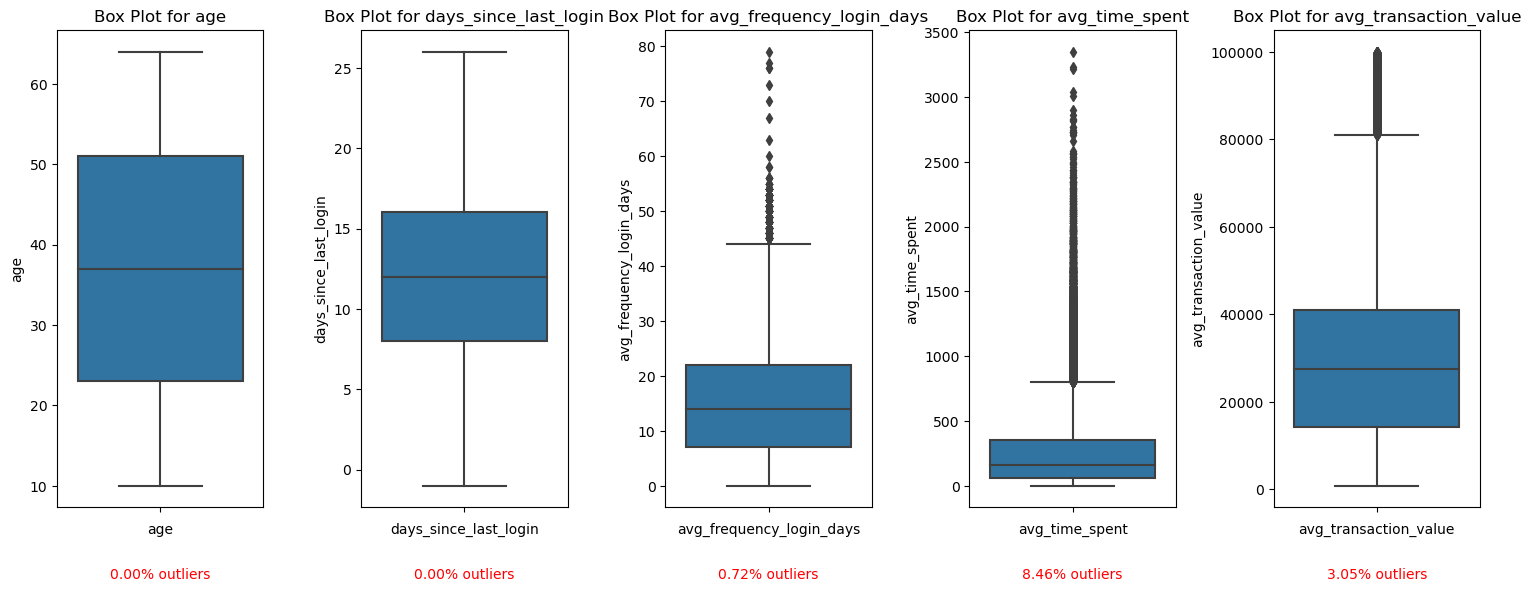

In [295]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Columns to plot including 'age'
columns_to_plot = ['age','days_since_last_login','avg_frequency_login_days', 'avg_time_spent', 'avg_transaction_value']
# , 'points_in_wallet'
# Function to calculate the percentage of outliers
def calculate_outlier_percentage(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    percentage = (len(outliers) / len(data)) * 100
    return percentage

# Plotting
plt.figure(figsize=(15, 6))
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    
    # Calculate and display the percentage of outliers below the graph
    outlier_percentage = calculate_outlier_percentage(df, column)
    plt.annotate(f'{outlier_percentage:.2f}% outliers', xy=(0.5, -0.15), xycoords='axes fraction', 
                 ha='center', fontsize=10, color='red', annotation_clip=False)

plt.tight_layout()
plt.show()


In [262]:
# Create a copy of the original DataFrame to ensure no changes are made to it
df_clean = df.copy()

# Remove rows with negative values in the specified columns
df_clean = df_clean[(df_clean['days_since_last_login'] >= 0) &
                    (df_clean['avg_time_spent'] >= 0) &
                    (df_clean['points_in_wallet'] >= 0) &
                    (df_clean['avg_frequency_login_days'] >= 0)]

# Verify the changes
print(df_clean.head())
print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape: {df_clean.shape}")


                                      age gender region_category  \
customer_id                                                        
fffe4300490044003600300030003800       18      F         Village   
fffe43004900440032003100300035003700   32      F            City   
fffe4300490044003100390032003600       44      F            Town   
fffe43004900440036003000330031003600   37      M            City   
fffe43004900440031003900350030003600   31      F            City   

                                      membership_category joining_date  \
customer_id                                                              
fffe4300490044003600300030003800      Platinum Membership   2017-08-17   
fffe43004900440032003100300035003700   Premium Membership   2017-08-28   
fffe4300490044003100390032003600            No Membership   2016-11-11   
fffe43004900440036003000330031003600        No Membership   2016-10-29   
fffe43004900440031003900350030003600        No Membership   2017-09-12   

    

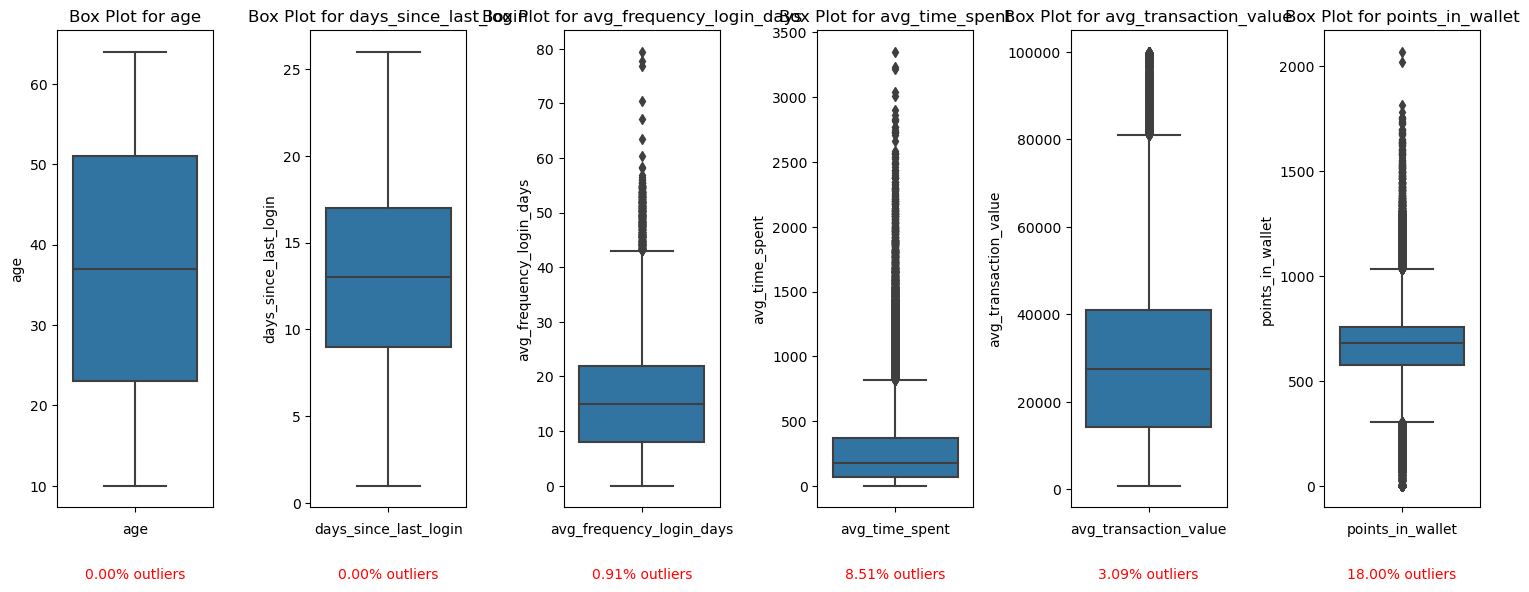

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Columns to plot including 'age'
columns_to_plot = ['age','days_since_last_login','avg_frequency_login_days', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet']

# Function to calculate the percentage of outliers
def calculate_outlier_percentage(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    percentage = (len(outliers) / len(data)) * 100
    return percentage

# Plotting
plt.figure(figsize=(15, 6))
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(y=df_clean[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    
    # Calculate and display the percentage of outliers below the graph
    outlier_percentage = calculate_outlier_percentage(df_clean, column)
    plt.annotate(f'{outlier_percentage:.2f}% outliers', xy=(0.5, -0.15), xycoords='axes fraction', 
                 ha='center', fontsize=10, color='red', annotation_clip=False)

plt.tight_layout()
plt.show()


In [272]:
# Replace negative values in 'days_since_last_login' with -1
df.loc[df['days_since_last_login'] < 0, 'days_since_last_login'] = -1


# Replace negative values in 'avg_time_spent' with 0
df.loc[df['avg_time_spent'] < 0, 'avg_time_spent'] = 0

# Replace negative values in 'points_in_wallet' with 0
df.loc[df['points_in_wallet'] < 0, 'points_in_wallet'] = 0

df['avg_frequency_login_days'] = df['avg_frequency_login_days'].apply(lambda x: int(max(x, 0)))


In [349]:
# Identify columns with numerical data
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Check for negative values in each numerical column
negative_values_info = {}

for column in numerical_columns:
    # Count of negative values
    negative_count = df[df[column] < 0].shape[0]
    
    # Calculate the percentage of negative values
    total_count = df[column].shape[0]  # Total number of rows
    negative_percentage = (negative_count / total_count) * 100
    
    # Store count and percentage if there are any negative values
    if negative_count > 0:
        negative_values_info[column] = {
            'Negative Count': negative_count,
            'Negative Percentage': negative_percentage
        }

# Display columns with negative values and their counts
if negative_values_info:
    print("Columns with negative values, their counts, and percentages:")
    for column, info in negative_values_info.items():
        print(f"{column}: {info['Negative Count']} negative values ({info['Negative Percentage']:.2f}%)")
else:
    print("No negative values found in any numerical columns.")


Columns with negative values, their counts, and percentages:
days_since_last_login: 3021 negative values (5.31%)
avg_time_spent: 2650 negative values (4.66%)
points_in_wallet: 197 negative values (0.35%)
churn_risk_score: 1163 negative values (2.04%)


In [266]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Heatmap to visualize missing data
# plt.figure(figsize=(12, 6))
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# plt.title('Missing Data Heatmap')
# plt.show()

In [267]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,56911.000000,56911.000000,56911.000000,56911.000000,56911.000000,56911.000000,36992.000000
mean,37.036355,12.005816,279.354564,29287.618994,14.627243,621.893353,3.463397
std,15.885146,6.219424,332.387094,19466.710286,9.490335,271.181507,1.409661
min,10.000000,-1.000000,0.000000,800.460000,0.000000,0.000000,-1.000000
25%,23.000000,8.000000,59.830000,14195.630000,7.000000,572.410000,3.000000
50%,37.000000,12.000000,161.620000,27560.380000,14.000000,680.100000,4.000000
75%,51.000000,16.000000,355.460000,40896.595000,22.000000,757.235000,5.000000
max,64.000000,26.000000,3350.060000,99995.030000,79.000000,2069.070000,5.000000


In [268]:
# Distribution of 'gender'
print(df['gender'].value_counts())

F          28462
M          28354
Unknown       95
Name: gender, dtype: int64


In [269]:
# # Histogram of 'age'
# sns.histplot(df['age'], bins=20)
# plt.show()

# # Scatter plot of 'avg_transaction_value' vs 'age'
# sns.scatterplot(x='age', y='avg_transaction_value', data=df)
# plt.show()

In [296]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plotting
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='points_in_wallet', y='churn_risk_score', alpha=0.7)
# sns.regplot(data=df, x='points_in_wallet', y='churn_risk_score', scatter=False, color='red')

# plt.title('Scatter Plot of Churn Risk Score vs. Points in Wallet')
# plt.xlabel('Points in Wallet')
# plt.ylabel('Churn Risk Score')
# plt.grid(True)
# plt.show()


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56911 entries, fffe4300490044003600300030003800 to fffe43004900440036003200340030003100
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          56911 non-null  object        
 1   age                           56911 non-null  int64         
 2   gender                        56911 non-null  object        
 3   security_no                   56911 non-null  object        
 4   region_category               56911 non-null  object        
 5   membership_category           56911 non-null  object        
 6   joining_date                  56911 non-null  datetime64[ns]
 7   joined_through_referral       56911 non-null  object        
 8   preferred_offer_types         56911 non-null  object        
 9   medium_of_operation           56911 non-null  object        
 10  internet_option               56911 n

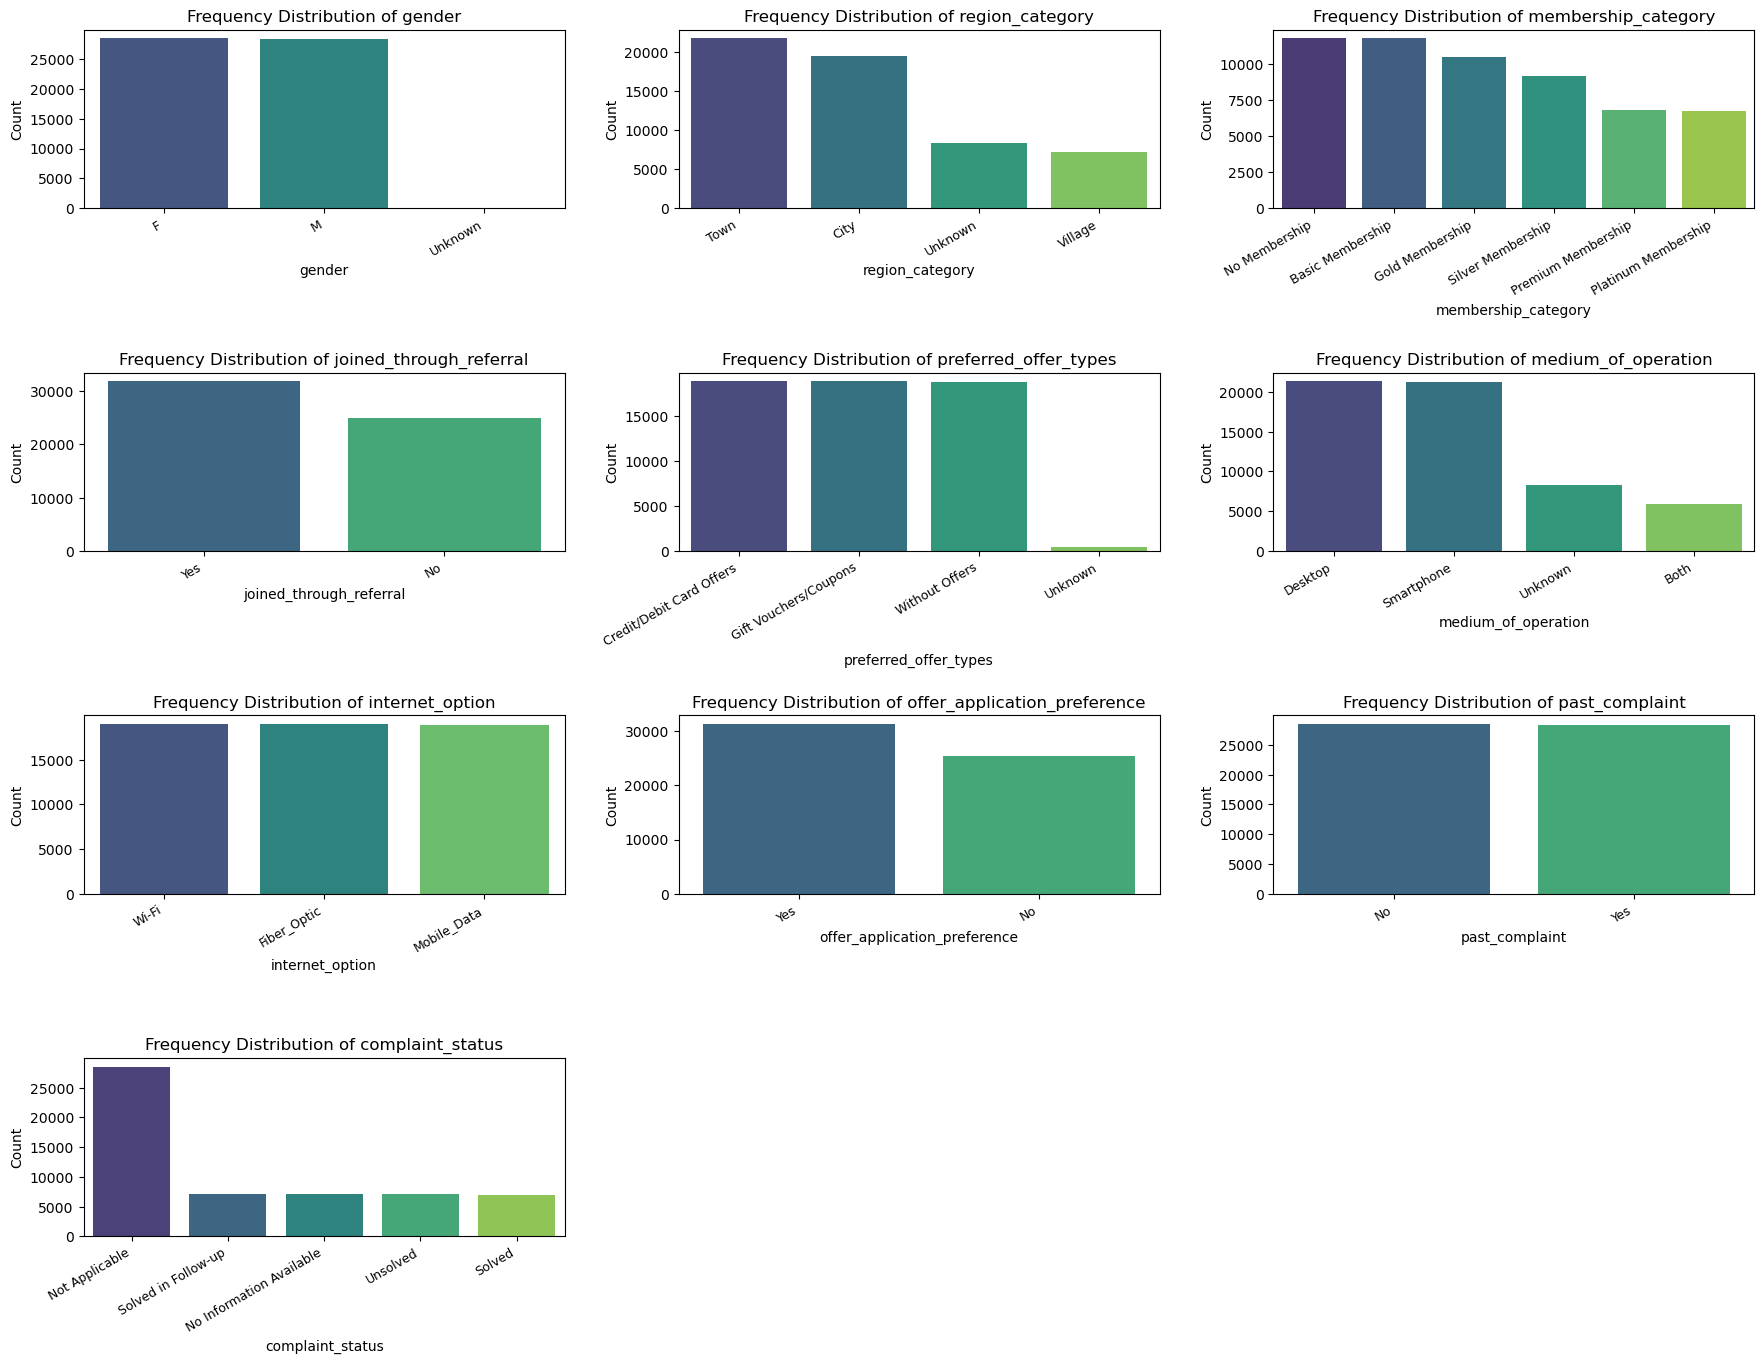

In [63]:
categorical_columns = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 
                       'preferred_offer_types', 'medium_of_operation', 'internet_option', 
                       'offer_application_preference', 'past_complaint', 'complaint_status']

# Set the overall figure size
plt.figure(figsize=(18, 14))

# Loop through each categorical column and create subplots
for i, column in enumerate(categorical_columns, start=1):
    plt.subplot(4, 3, i)  # Create a grid of subplots with 4 rows and 3 columns
    
    # Get the frequency counts of the categorical column
    freq = df[column].value_counts()
    
    # Create a barplot for each categorical column
    sns.barplot(x=freq.index, y=freq.values, palette='viridis')
    
    # Set title and labels
    plt.title(f'Frequency Distribution of {column}', fontsize=12)
    plt.xlabel(column, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    
    # Rotate x-axis labels to avoid overlapping
    plt.xticks(rotation=30, ha='right', fontsize=9)
    
# Adjust layout to avoid overlap
plt.tight_layout(pad=2.0)
plt.show()

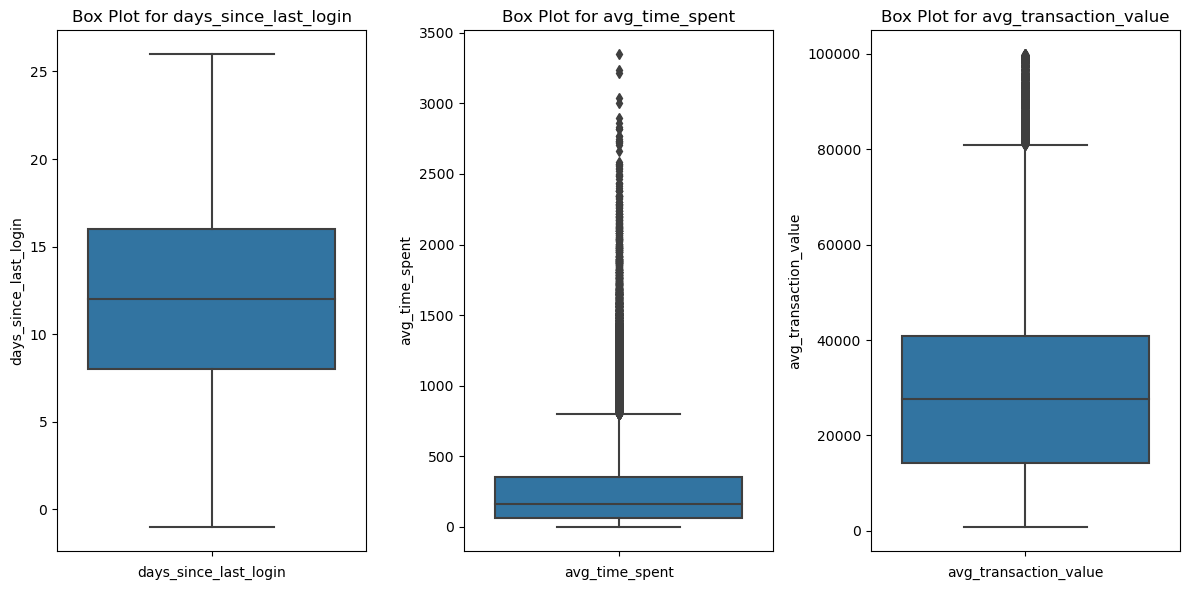

In [297]:
# Columns to plot
columns_to_plot = ['days_since_last_login', 'avg_time_spent','avg_transaction_value']
# , 'points_in_wallet'

# Plotting
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

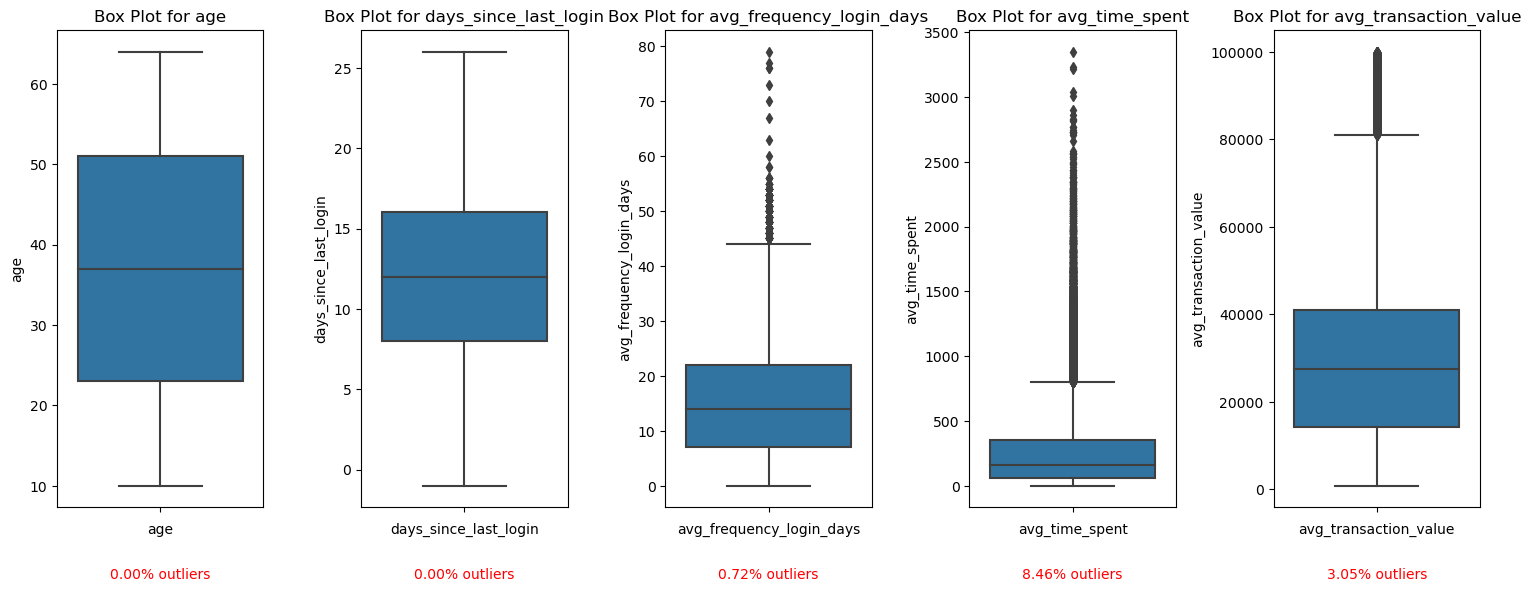

In [298]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Columns to plot including 'age'
columns_to_plot = ['age','days_since_last_login','avg_frequency_login_days', 'avg_time_spent', 'avg_transaction_value']
# , 'points_in_wallet'

# Function to calculate the percentage of outliers
def calculate_outlier_percentage(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    percentage = (len(outliers) / len(data)) * 100
    return percentage

# Plotting
plt.figure(figsize=(15, 6))
for i, column in enumerate(columns_to_plot, start=1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)
    
    # Calculate and display the percentage of outliers below the graph
    outlier_percentage = calculate_outlier_percentage(df, column)
    plt.annotate(f'{outlier_percentage:.2f}% outliers', xy=(0.5, -0.15), xycoords='axes fraction', 
                 ha='center', fontsize=10, color='red', annotation_clip=False)

plt.tight_layout()
plt.show()


In [299]:
# # check for outliers
# columns_of_interest = ['days_since_last_login','avg_time_spent']  
# # ,'avg_transaction_value', 'points_in_wallet'
# # Dictionary to hold outlier data and counts for each specified column
# outliers_info = {}

# # Loop through the specified columns for Z-score outlier detection
# for column in columns_of_interest:
#     if column in df.columns:
#         # Calculate Z-scores
#         mean = df[column].mean()
#         std_dev = df[column].std()
#         df['Z-Score'] = (df[column] - mean) / std_dev

#         # Define threshold for Z-score
#         threshold = 3  # Commonly used threshold

#         # Identify outliers
#         outliers_z = df[np.abs(df['Z-Score']) > threshold]

#         # Store outliers and count in the dictionary
#         if not outliers_z.empty:
#             outliers_info[column] = {
#                 'Outliers DataFrame': outliers_z[[column, 'Z-Score']],
#                 'Count': outliers_z.shape[0]
#             }
#     else:
#         print(f"Column {column} does not exist in the DataFrame.")

# # Display outliers information for each column
# outliers_info


# import matplotlib.pyplot as plt


# # Check if outliers_info contains any data
# if outliers_info:
#     for column, info in outliers_info.items():
#         plt.figure(figsize=(10, 6))
#         plt.scatter(df.index, df[column], label='Data Points', alpha=0.5)
#         plt.scatter(info['Outliers DataFrame'].index, info['Outliers DataFrame'][column], color='red', label='Outliers', edgecolor='black')
#         plt.xlabel('Index')
#         plt.ylabel(column)
#         plt.title(f'Scatter Plot of {column} with Outliers (Total Outliers: {info["Count"]})')
#         plt.legend()
#         plt.show()  # Ensure the plot is displayed

#     # Print the total number of outliers for each column
#     print("Total number of outliers for each column:")
#     for column, info in outliers_info.items():
#         print(f"{column}: {info['Count']} outliers")

# else:
#     print("No outliers detected in any of the specified columns.")

In [300]:
# import statsmodels.api as sm
# from statsmodels.regression.linear_model import OLS
# from statsmodels.stats.outliers_influence import OLSInfluence


# # Choose independent and dependent variables
# independent_vars = ['avg_transaction_value', 'points_in_wallet']  # Replace with your independent variables
# dependent_var = 'churn_risk_score'  # Replace with your dependent variable

# # Prepare data for regression
# X = df[independent_vars]
# X = sm.add_constant(X)  # Adds a constant term to the predictor
# y = df[dependent_var]

# # Fit the linear regression model
# model = OLS(y, X).fit()

# # Get p-values for each independent variable
# p_values = model.pvalues
# print("P-values for each independent variable:")
# print(p_values)

# # Apply Bonferroni correction
# alpha = 0.05
# m = len(independent_vars)  # Number of tests
# bonferroni_alpha = alpha / m
# print(f"\nBonferroni corrected alpha level: {bonferroni_alpha}")

# # Identify significant variables
# significant_vars = p_values[p_values < bonferroni_alpha]
# print("\nSignificant variables after Bonferroni correction:")
# print(significant_vars)

Filtered data shape: (36992, 20)


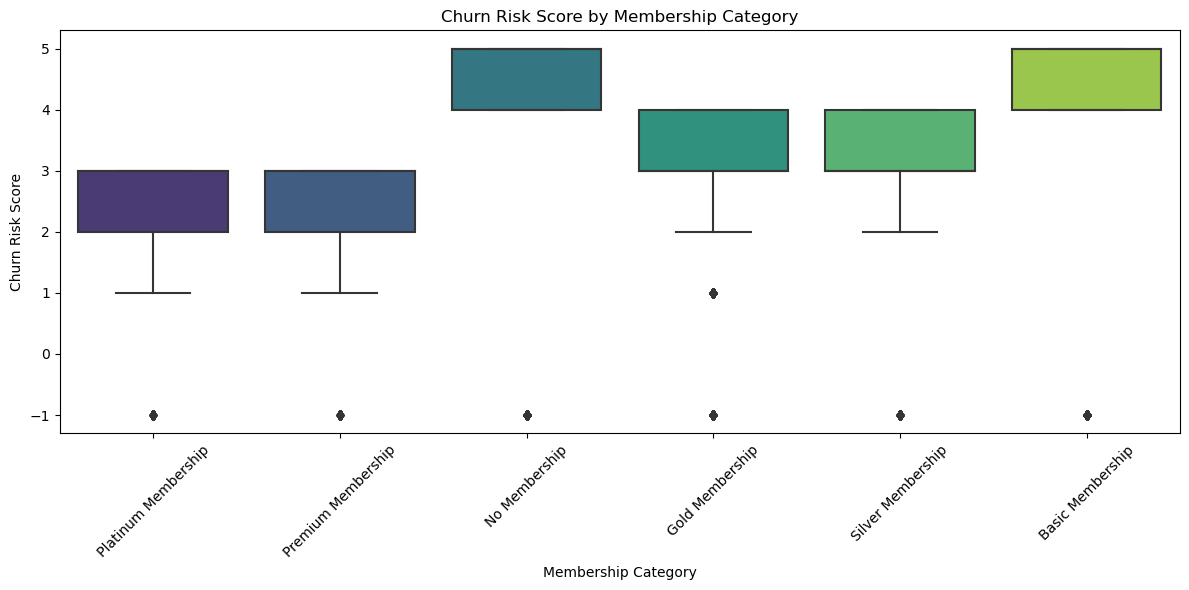

In [303]:
# Filter the dataset to include only rows with non-missing churn_risk_score
df_valid_churn = df[df['churn_risk_score'].notna()]

# Check the shape of the filtered data to ensure correctness
print(f"Filtered data shape: {df_valid_churn.shape}")

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x='membership_category', y='churn_risk_score', data=df_valid_churn, palette='viridis')

plt.title('Churn Risk Score by Membership Category')
plt.xlabel('Membership Category')
plt.ylabel('Churn Risk Score')
plt.xticks(rotation=45)  # Rotate x labels if needed

plt.tight_layout()
plt.show()


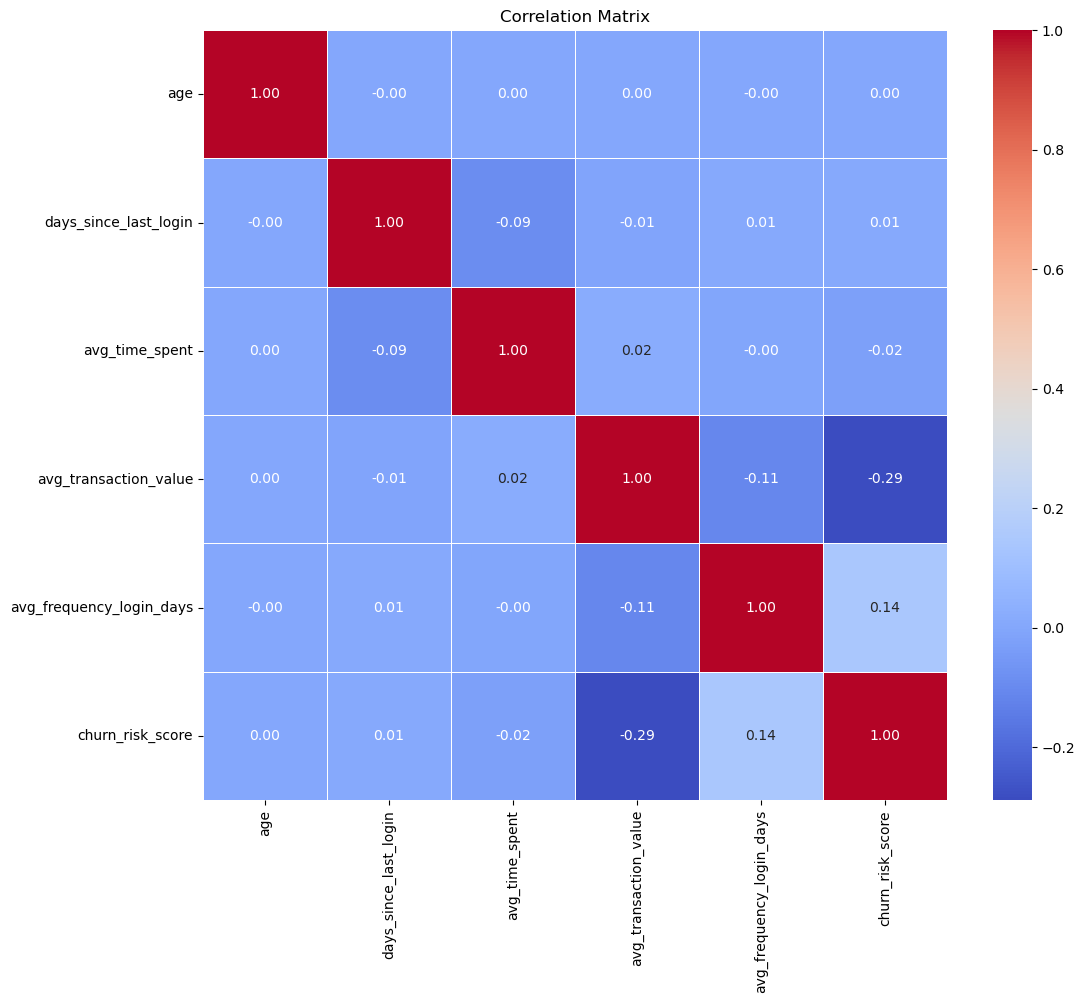

In [307]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()


# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


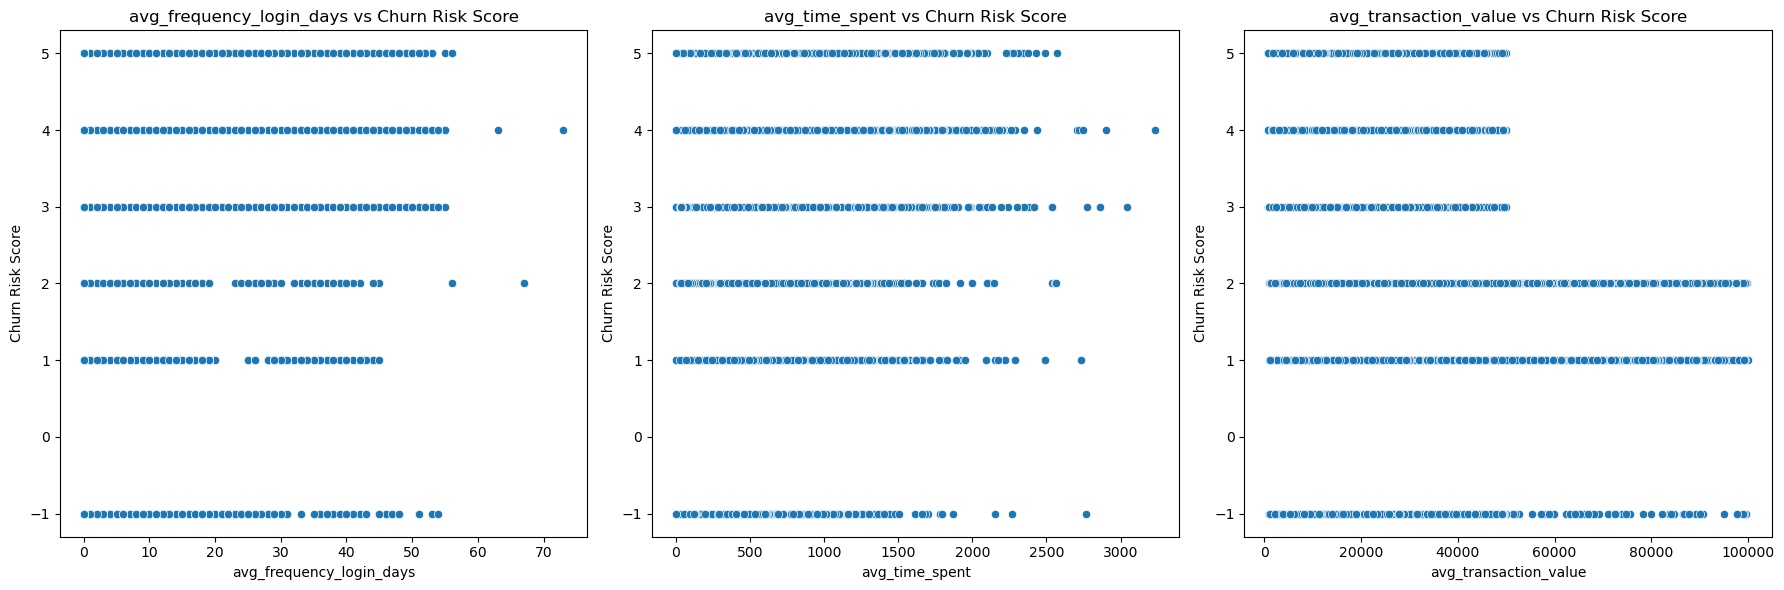

In [304]:



# Columns to check
numerical_columns = ['avg_frequency_login_days', 'avg_time_spent', 'avg_transaction_value']


# Plotting
plt.figure(figsize=(18, 6))

for i, column in enumerate(numerical_columns, start=1):
    plt.subplot(1, len(numerical_columns), i)
    sns.scatterplot(x=df_filtered[column], y=df_valid_churn['churn_risk_score'])
    plt.title(f'{column} vs Churn Risk Score')
    plt.xlabel(column)
    plt.ylabel('Churn Risk Score')

plt.tight_layout()
plt.show()


In [301]:

import scipy.stats as stats
import matplotlib.pyplot as plt



# Specify the categorical columns
cat_col1 = 'region_category'
cat_col2 = 'membership_category'

# Create a contingency table
contingency_table = pd.crosstab(df[cat_col1], df[cat_col2])

# Perform Chi-Squared test
chi2_stat, p_value, dof, ex = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{ex}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - The variables are dependent.")
else:
    print("Fail to reject the null hypothesis - The variables are independent.")


Chi-Squared Statistic: 43.474939236438885
P-Value: 0.0001328215596749396
Degrees of Freedom: 15
Expected Frequencies:
[[4051.9131978  3618.51496196 4054.31524661 2311.45725782 2340.28184358
  3152.51749222]
 [4515.42766776 4032.45128358 4518.10449649 2575.87404895 2607.99599374
  3513.14650946]
 [1737.86803957 1551.98327213 1738.89827977  991.38542637 1003.74830876
  1352.1166734 ]
 [1502.79109487 1342.05048233 1503.68197712  857.28326686  867.97385391
  1169.21932491]]
Reject the null hypothesis - The variables are dependent.


In [93]:
def cramers_v(chi2, n, r, c):
    return np.sqrt(chi2 / (n * min(r - 1, c - 1)))

# Calculate Cramer's V
n = contingency_table.sum().sum()
r, c = contingency_table.shape
cramers_v_value = cramers_v(chi2_stat, n, r, c)

print(f"Cramer's V: {cramers_v_value}")

# Interpretation of Cramer's V
if cramers_v_value < 0.1:
    print("Very weak association.")
elif cramers_v_value < 0.3:
    print("Weak association.")
elif cramers_v_value < 0.5:
    print("Moderate association.")
elif cramers_v_value < 0.7:
    print("Strong association.")
else:
    print("Very strong association.")


Cramer's V: 0.0159573494618485
Very weak association.


In [97]:
import pandas as pd
from scipy import stats

# Example columns
numerical_column = 'avg_transaction_value'
categorical_column = 'region_category'

# Group the data
groups = [group[numerical_column].dropna() for name, group in df.groupby(categorical_column)]

# Perform ANOVA
f_score, p_value = stats.f_oneway(*groups)

print(f"F-Score: {f_score}")
print(f"P-Value: {p_value}")

F-Score: 12.177515780009433
P-Value: 5.81010102487201e-08


In [354]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a box plot
# plt.figure(figsize=(12, 6))
# sns.boxplot(x=categorical_column, y=numerical_column, data=df)
# plt.title(f'Box Plot of {numerical_column} by {categorical_column}')
# plt.xlabel(categorical_column)
# plt.ylabel(numerical_column)
# plt.show()

In [353]:
# import numpy as np

# # Calculate means and standard errors
# means = df.groupby(categorical_column)[numerical_column].mean()
# std_errors = df.groupby(categorical_column)[numerical_column].sem()

# # Plot
# plt.figure(figsize=(12, 6))
# plt.errorbar(means.index, means, yerr=std_errors, fmt='o', capsize=5, label='Mean with Error Bars')
# plt.xlabel(categorical_column)
# plt.ylabel(numerical_column)
# plt.title(f'Scatter Plot with Error Bars for {numerical_column} by {categorical_column}')
# plt.show()
